In [5]:
import pandas as pd
import numpy as np
rd = pd.read_csv('C:/Users/mrame/Downloads/2001-05.csv')
rd.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11034701,JA366925,1/1/2001 11:00,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,8.0,45.0,11,NaN,NaN,2001,8/5/2017 15:50,NaN,NaN,NaN
1,11042125,JA376558,12/16/2011 0:00,003XX W 64TH ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,HOSPITAL BUILDING/GROUNDS,False,False,...,20.0,68.0,11,NaN,NaN,2011,8/5/2017 15:50,NaN,NaN,NaN
2,11042141,JA376559,5/16/2013 0:00,003XX W 64TH ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,HOSPITAL BUILDING/GROUNDS,False,False,...,20.0,68.0,11,NaN,NaN,2013,8/5/2017 15:50,NaN,NaN,NaN
3,11042183,JA376593,7/12/2001 0:01,024XX N LUNA AVE,266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,...,30.0,19.0,2,NaN,NaN,2001,8/5/2017 15:50,NaN,NaN,NaN
4,11042905,JA374476,1/1/2003 0:01,056XX S ARTESIAN AVE,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,15.0,63.0,17,NaN,NaN,2003,10/27/2018 16:00,NaN,NaN,NaN


In [6]:
import matplotlib.pyplot as plot
import seaborn as sea
plot.figure(figsize=(1,1))
sea.heatmap(rd.isnull(), cbar = False, cmap = 'viridis')

In [7]:
rd = rd.dropna()
rd = rd.drop(['ID', 'Case Number', 'Block', 'IUCR','Domestic', 'Beat', 'District', 'Ward','X Coordinate', 'Y Coordinate','Updated On', 'FBI Code'], axis = 1)
pd.value_counts(rd['Primary Type'])[:10]

THEFT              1223
BATTERY             923
ASSAULT             511
NARCOTICS           109
HOMICIDE             89
BURGLARY             67
CRIMINAL DAMAGE      62
ROBBERY              60
GAMBLING             10
SEX OFFENSE          10
Name: Primary Type, dtype: int64

In [8]:
pd.value_counts(rd['Location Description'])[:10]

STREET                1545
OTHER                  344
RESIDENCE              312
SIDEWALK               291
APARTMENT              157
ALLEY                  153
RESTAURANT              55
DRUG STORE              27
SMALL RETAIL STORE      20
CTA BUS                 17
Name: Location Description, dtype: int64

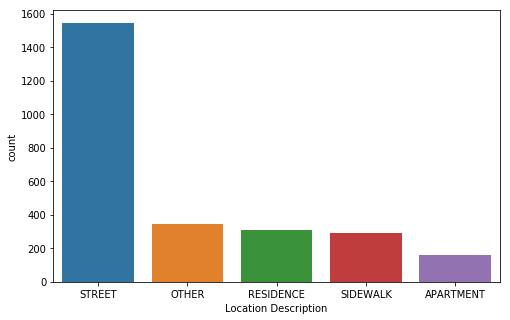

In [9]:
plot.figure(figsize = (8, 5))
sea.countplot(x= 'Location Description', data = rd, order = rd['Location Description'].value_counts().iloc[0:5].index)

In [10]:
import folium
import matplotlib.pyplot as plt
import seaborn as sea
c_m = folium.Map(location=[41.864073,-87.706819],
                        zoom_start=11,
                        tiles="CartoDB Positron")
locs = rd.groupby('Community Area').first()
new_locs = locs.loc[:, ['Latitude', 'Longitude', 'Location Description', 'Arrest']]
new_locs.head()

,Latitude,Longitude,Location Description,Arrest
Community Area,,,,
1.0,42.012652,-87.673666,ALLEY,False
2.0,41.996328,-87.692280,RESIDENCE,True
3.0,41.970251,-87.654849,VACANT LOT,True
4.0,41.971725,-87.685363,OTHER,False
5.0,41.947240,-87.684633,STREET,False


In [11]:
for i in range(len(new_locs)):
    lat = new_locs.iloc[i][0]
    long = new_locs.iloc[i][1]
    popup_text = """Community Index : {}<br>
                Arrest : {}<br>
                Location Description : {}<br>"""
    popup_text = popup_text.format(new_locs.index[i],
                               new_locs.iloc[i][-1],
                               new_locs.iloc[i][-2]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text, fill = False).add_to(c_m)

In [12]:
c_m 

In [13]:
uniq_locs = rd['Location'].value_counts()
uniq_locs.index

Index(['(41.909307068, -87.80576669)', '(42.019399237, -87.675049485)',
       '(41.754592961, -87.741528537)', '(41.873807522, -87.69445629)',
       '(41.893962515, -87.636176148)', '(42.019450952, -87.680742064)',
       '(41.8032982, -87.653195042)', '(41.87178962, -87.633564301)',
       '(41.896664035, -87.629175344)', '(41.881883933, -87.640060441)',
       ...
       '(41.970356385, -87.66766694)', '(41.821453036, -87.611172044)',
       '(41.967602996, -87.664198672)', '(41.76437735, -87.638299199)',
       '(41.886635588, -87.659656749)', '(41.762040495, -87.616182056)',
       '(41.762304351, -87.655578105)', '(41.91112235, -87.662459662)',
       '(41.758659689, -87.683079488)', '(41.797012513, -87.664663275)'],
      dtype='object', length=2926)

In [14]:
crime_count = pd.DataFrame({"Raw_String" : uniq_locs.index, "ValueCount":uniq_locs})
crime_count.index = range(len(uniq_locs))
crime_count.head()

,Raw_String,ValueCount
0,"(41.909307068, -87.80576669)",19
1,"(42.019399237, -87.675049485)",14
2,"(41.754592961, -87.741528537)",5
3,"(41.873807522, -87.69445629)",5
4,"(41.893962515, -87.636176148)",5


In [15]:
def Location_extractor(Raw_Str):
    preProcess = Raw_Str[1:-1].split(',')
    lat =  float(preProcess[0])
    long = float(preProcess[1])
    return (lat, long)

In [16]:
crime_count['LocationCoord'] = crime_count['Raw_String'].apply(Location_extractor)
crime_count  = crime_count.drop('Raw_String', axis = 1)

In [17]:
crime_map = folium.Map(location=[41.895140898, -87.624255632],
                        zoom_start=11,
                        tiles="CartoDB Positron")

for index in range(500):
    latitude = crime_count['LocationCoord'].iloc[index][0]
    longitude = crime_count['LocationCoord'].iloc[index][1]
    radius = crime_count['ValueCount'].iloc[index] / 45
    
    if crime_count['ValueCount'].iloc[index] > 1000:
        color = "#FF4500"
    else:
        color = "#008080"
    
    popup_text = """Latitude : {}<br>
                Longitude : {}<br>
                Criminal Incidents : {}<br>"""
    popup_text = popup_text.format(lat,
                               long,
                               crime_count['ValueCount'].iloc[i]
                               )
    folium.CircleMarker(location = [latitude, longitude], popup= popup_text,radius = radius, color = color, fill = True).add_to(crime_map)
    

In [18]:
crime_map

In [19]:
rdt = rd[rd['Primary Type'] == 'THEFT']

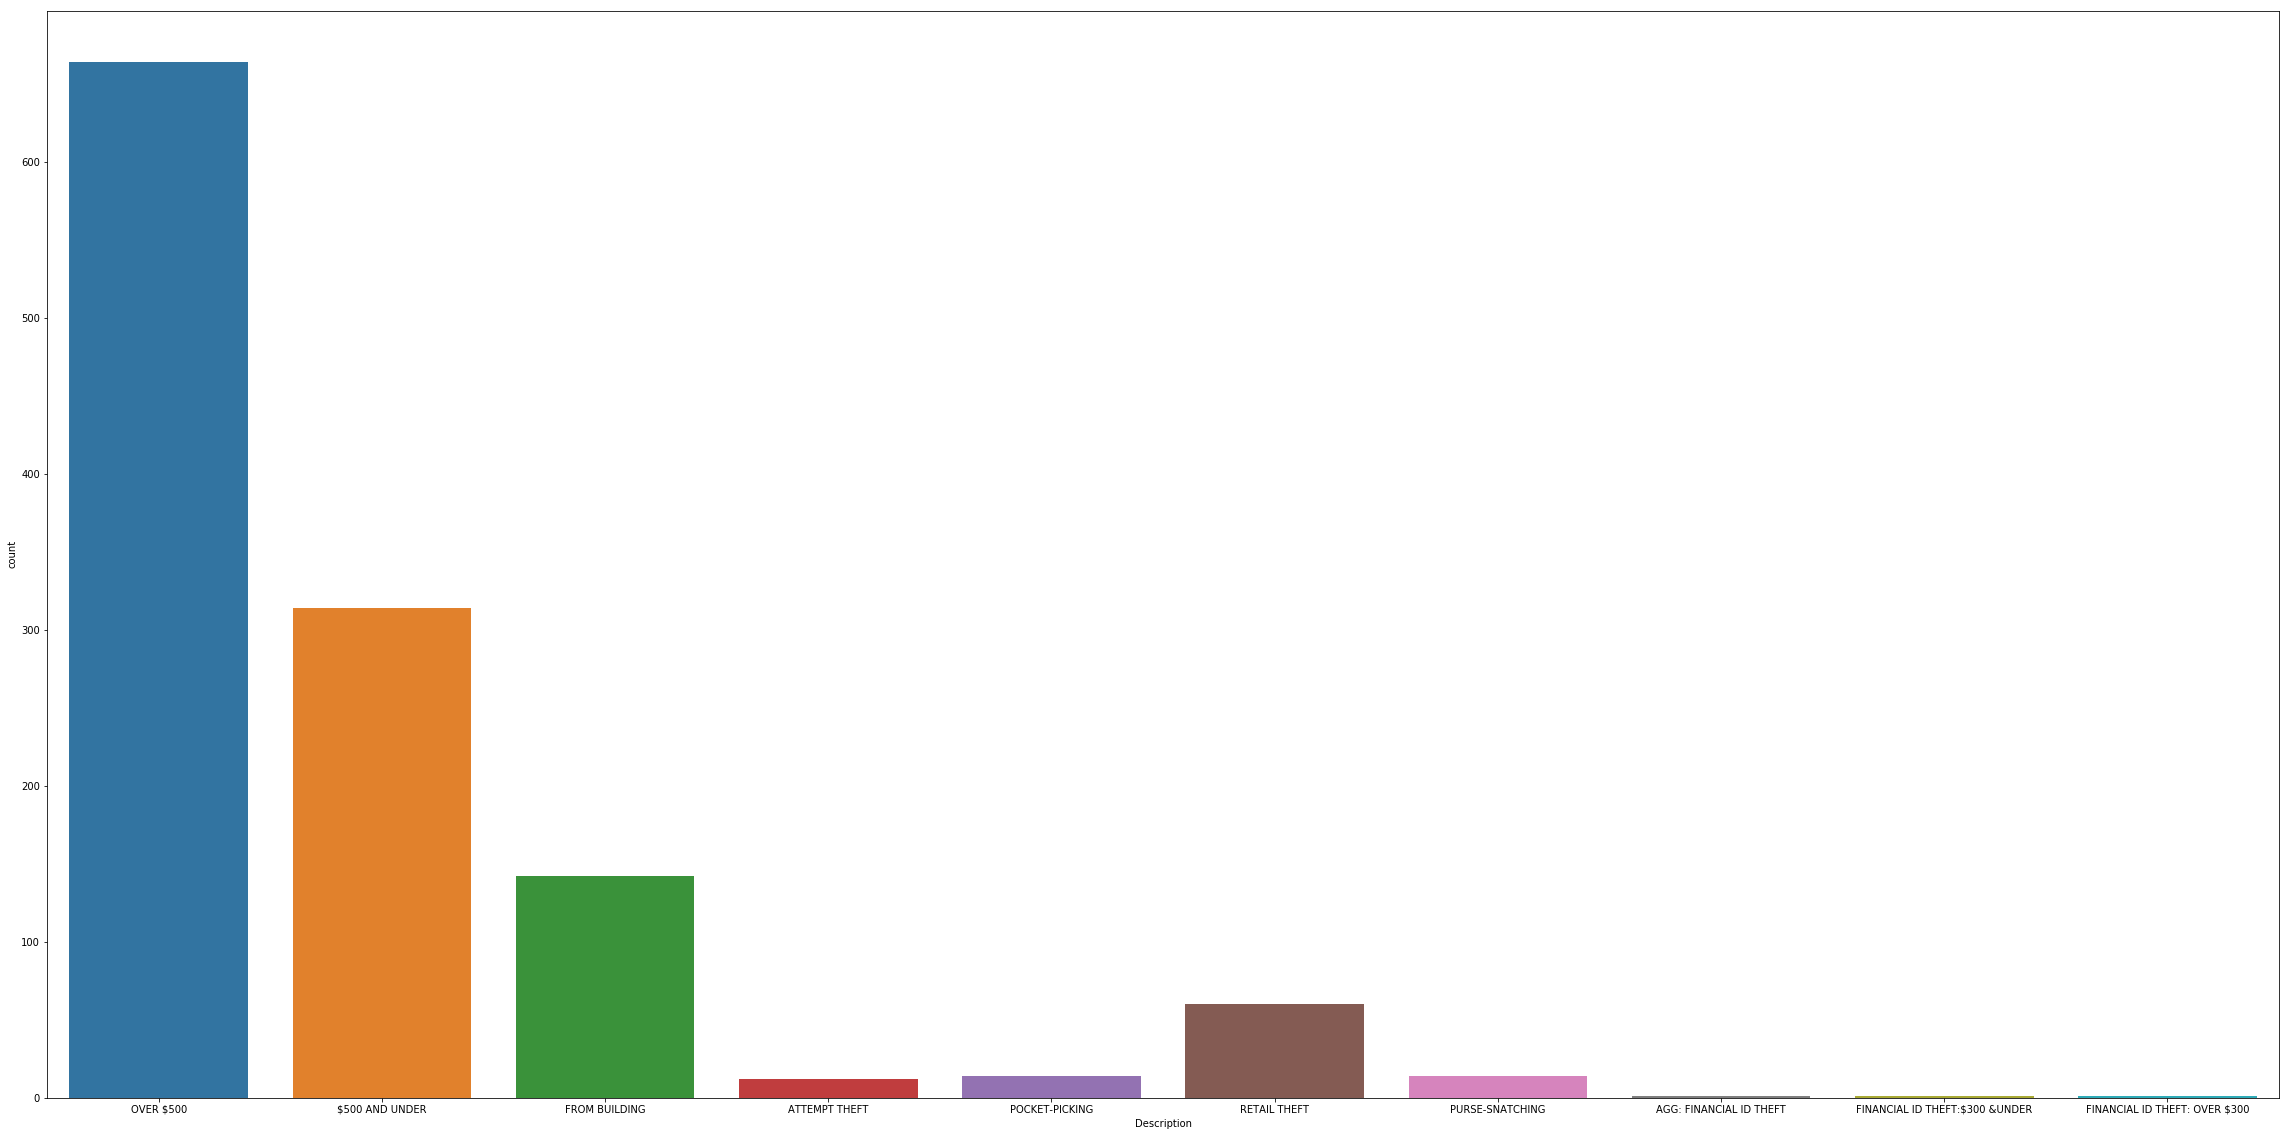

In [20]:
plot.figure(figsize = (40, 20))
sea.countplot(x = rdt['Description'])

In [21]:
rdt_data = pd.DataFrame({"Counts": rdt['Description'].value_counts(), "Description" : rdt['Description'].value_counts().index})
rdt_data.reset_index(inplace=True)
rdt_data = rdt_data.drop(columns=['index'], axis = 1)
rdt_data.head()

,Counts,Description
0,664,OVER $500
1,314,$500 AND UNDER
2,142,FROM BUILDING
3,60,RETAIL THEFT
4,14,PURSE-SNATCHING


In [22]:
rdt['Date'] = pd.to_datetime(rdt['Date'])

C:\Users\mrame\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
rdt['Month'] = rdt['Date'].apply(lambda x : x.month)

C:\Users\mrame\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
theft_in_months = pd.DataFrame({"thefts" : rdt['Month'].value_counts(), "month" : rdt["Month"].value_counts().index}, index = range(12))

In [25]:
theft_in_months.fillna(0, inplace=True)
theft_in_months = theft_in_months.sort_values(['month'], ascending=[1])

In [26]:
theft_in_months.head()

,thefts,month
10,127.0,1
11,114.0,2
5,101.0,3
9,110.0,4
8,122.0,5


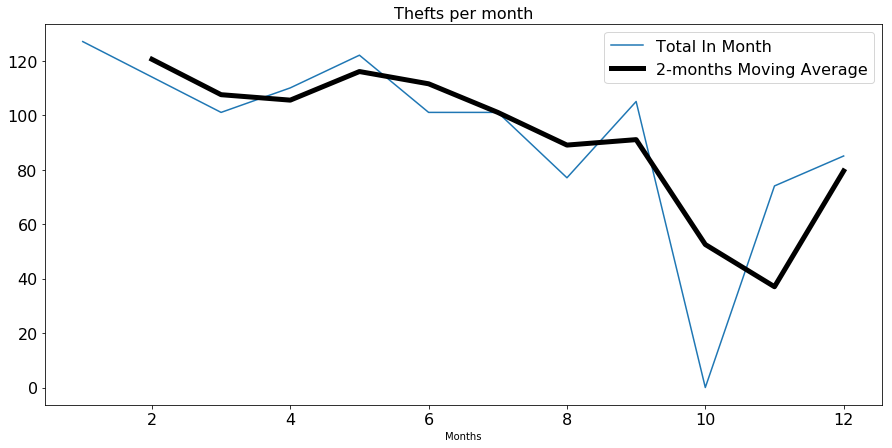

In [27]:
plt.figure(figsize = (15,7))
plt.plot(theft_in_months['month'],theft_in_months['thefts'], label = 'Total In Month')
plt.plot(theft_in_months['month'],theft_in_months['thefts'].rolling(window = 2).mean(),color='black', linewidth=5, label='2-months Moving Average' )

plt.title('Thefts per month', fontsize=16)
plt.xlabel('Months')
plt.legend(prop={'size':16})
plt.tick_params(labelsize=16);

In [31]:
print(max(rdt['Date']))
print(min(rdt['Date']))

2005-12-31 21:00:00
2001-01-10 18:00:00


In [32]:
rdt['Date'].iloc[0].date()

datetime.date(2002, 3, 12)

In [33]:
rd_td = rdt['Location']
rd_td.index = rdt['Date']
resampled = rd_td.resample('D')
rd_td['MEAN'] = resampled.size().mean()
rd_td['STD'] = resampled.size().std()

C:\Users\mrame\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\mrame\Anaconda3\lib\site-packages\pandas\core\series.py:915: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[key] = value
C:\Users\mrame\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\mrame\Anacond

In [34]:
UCL = rd_td['MEAN'] + 3 * rd_td['STD']
LCL = rd_td['MEAN'] -  3 * rd_td['STD']

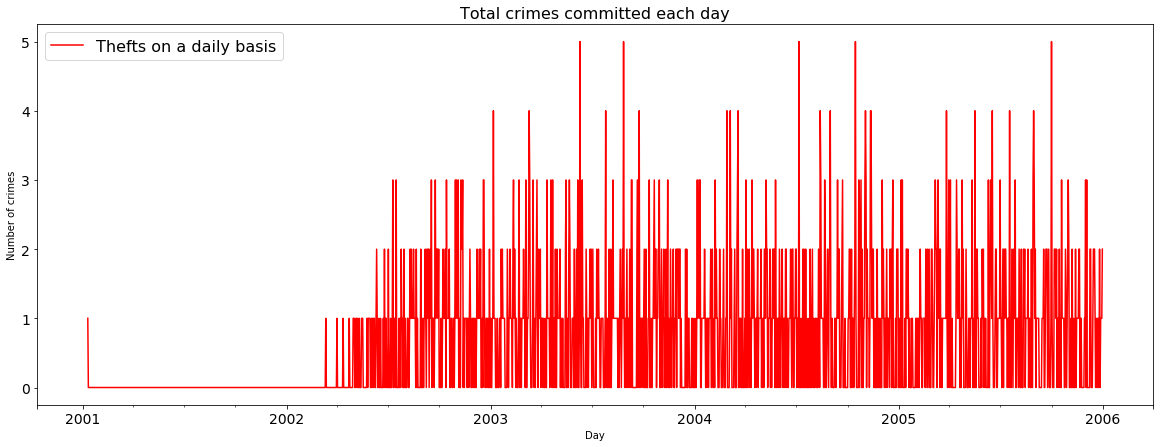

In [35]:
plt.figure(figsize=(20, 7))
resampled.size().plot(label = "Thefts on a daily basis", color = 'red')
plt.title('Total crimes committed each day', fontsize=16)
plt.xlabel('Day')
plt.ylabel('Number of crimes')
plt.tick_params(labelsize=14)
plt.legend(prop={'size':16})

In [37]:
rdt = rd[rd['Primary Type'] == 'BATTERY']

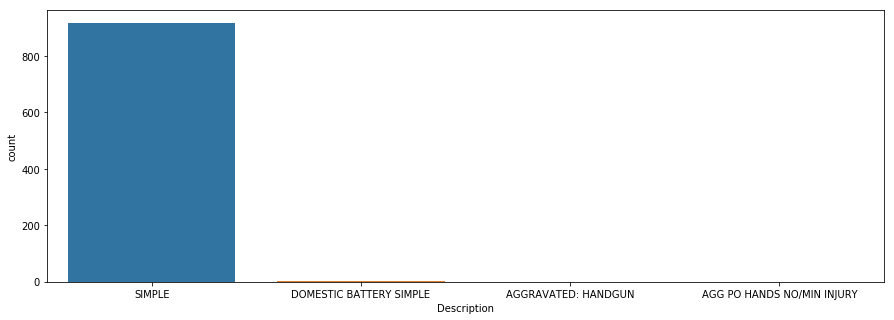

In [38]:
plot.figure(figsize = (15,5))
sea.countplot(x = rdt['Description'])

In [39]:
rdt_data = pd.DataFrame({"Counts": rdt['Description'].value_counts(), "Description" : rdt['Description'].value_counts().index})
rdt_data.reset_index(inplace=True)
rdt_data = rdt_data.drop(columns=['index'], axis = 1)
rdt_data.head()

,Counts,Description
0,917,SIMPLE
1,4,DOMESTIC BATTERY SIMPLE
2,1,AGGRAVATED: HANDGUN
3,1,AGG PO HANDS NO/MIN INJURY


In [40]:
rdt['Date'] = pd.to_datetime(rdt['Date'])

C:\Users\mrame\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
rdt['Month'] = rdt['Date'].apply(lambda x : x.month)

C:\Users\mrame\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
battery_in_months = pd.DataFrame({"Battery" : rdt['Month'].value_counts(), "month" : rdt["Month"].value_counts().index}, index = range(12))

In [43]:
battery_in_months.fillna(0, inplace=True)
battery_in_months = battery_in_months.sort_values(['month'], ascending=[1])

In [44]:
battery_in_months.head()

,Battery,month
11,70.0,1
10,103.0,2
8,82.0,3
9,79.0,4
0,0.0,5


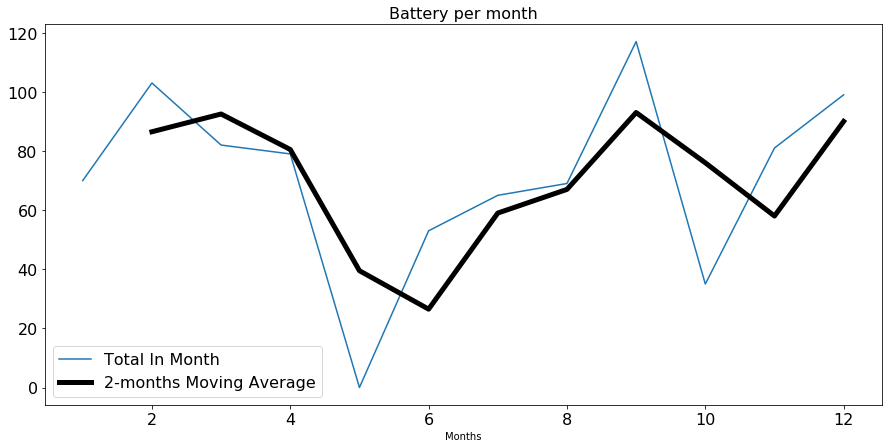

In [45]:
plt.figure(figsize = (15,7))
plt.plot(battery_in_months['month'],battery_in_months['Battery'], label = 'Total In Month')
plt.plot(battery_in_months['month'],battery_in_months['Battery'].rolling(window = 2).mean(),color='black', linewidth=5, label='2-months Moving Average' )

plt.title('Battery per month', fontsize=16)
plt.xlabel('Months')
plt.legend(prop={'size':16})
plt.tick_params(labelsize=16);

In [55]:
print(max(rdt['Date']))
print(min(rdt['Date']))

2005-12-31 22:00:00
2002-04-21 19:15:00


In [51]:
rdt['Date'].iloc[0].date()

datetime.date(2004, 9, 21)

In [52]:
rd_td = rdt['Location']
rd_td.index = rdt['Date']
resampled = rd_td.resample('D')
rd_td['MEAN'] = resampled.size().mean()
rd_td['STD'] = resampled.size().std()

C:\Users\mrame\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\mrame\Anaconda3\lib\site-packages\pandas\core\series.py:915: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[key] = value
C:\Users\mrame\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\mrame\Anacond

In [53]:
UCL = rd_td['MEAN'] + 3 * rd_td['STD']
LCL = rd_td['MEAN'] -  3 * rd_td['STD']

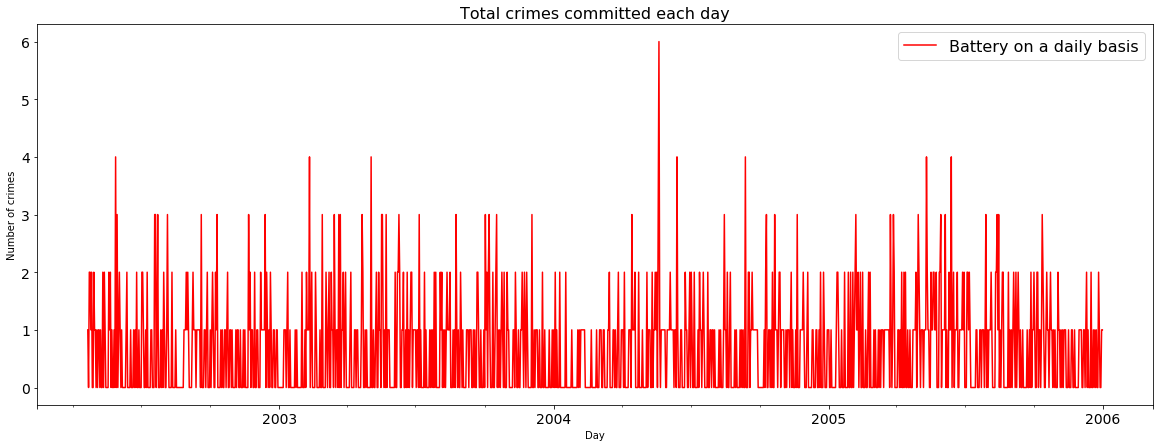

In [54]:
plt.figure(figsize=(20, 7))
resampled.size().plot(label = "Battery on a daily basis", color = 'red')
plt.title('Total crimes committed each day', fontsize=16)
plt.xlabel('Day')
plt.ylabel('Number of crimes')
plt.tick_params(labelsize=14)
plt.legend(prop={'size':16})

In [69]:
rdt = rd[rd['Primary Type'] == 'HOMICIDE']

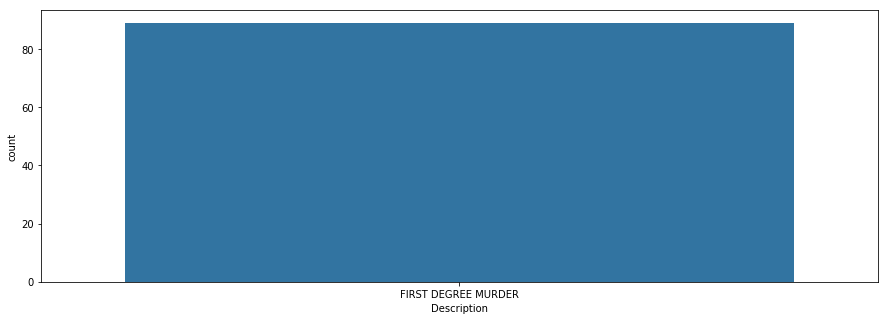

In [70]:
plot.figure(figsize = (15,5))
sea.countplot(x = rdt['Description'])

In [71]:
rdt_data = pd.DataFrame({"Counts": rdt['Description'].value_counts(), "Description" : rdt['Description'].value_counts().index})
rdt_data.reset_index(inplace=True)
rdt_data = rdt_data.drop(columns=['index'], axis = 1)
rdt_data.head()

,Counts,Description
0,89,FIRST DEGREE MURDER


In [72]:
print(max(rdt['Date']))
print(min(rdt['Date']))

9/9/2001 22:30
10/2/2001 1:50


In [73]:
rdt = rd[rd['Primary Type'] == 'DECEPTIVE PRACTICE']

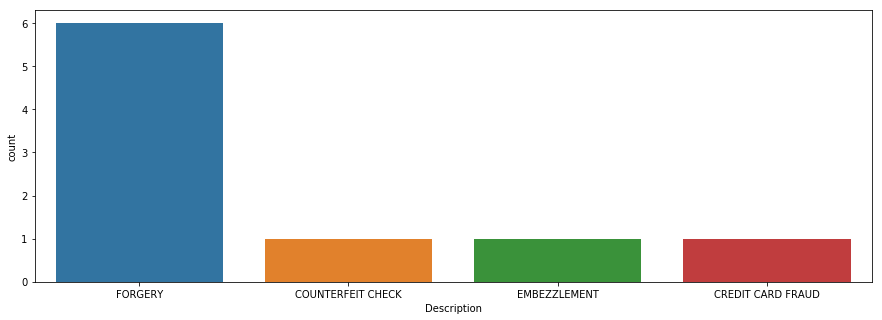

In [74]:
plot.figure(figsize = (15,5))
sea.countplot(x = rdt['Description'])

In [75]:
rdt_data = pd.DataFrame({"Counts": rdt['Description'].value_counts(), "Description" : rdt['Description'].value_counts().index})
rdt_data.reset_index(inplace=True)
rdt_data = rdt_data.drop(columns=['index'], axis = 1)
rdt_data.head()

,Counts,Description
0,6,FORGERY
1,1,COUNTERFEIT CHECK
2,1,EMBEZZLEMENT
3,1,CREDIT CARD FRAUD


In [76]:
print(max(rdt['Date']))
print(min(rdt['Date']))

8/13/2003 14:55
1/23/2004 14:30


In [77]:
rdt = rd[rd['Primary Type'] == 'CRIM SEXUAL ASSAULT']

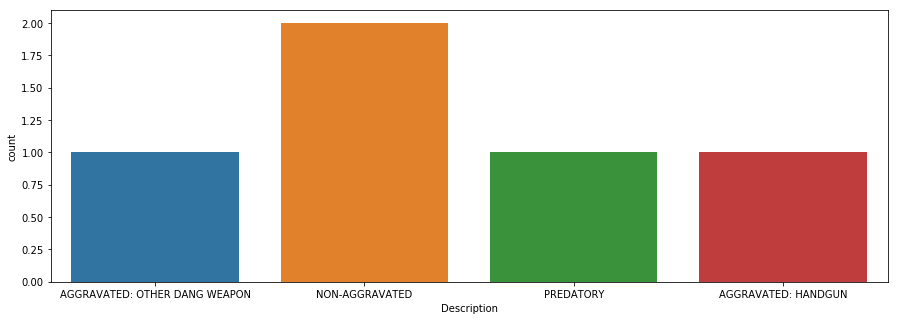

In [78]:
plot.figure(figsize = (15,5))
sea.countplot(x = rdt['Description'])

In [79]:
rdt_data = pd.DataFrame({"Counts": rdt['Description'].value_counts(), "Description" : rdt['Description'].value_counts().index})
rdt_data.reset_index(inplace=True)
rdt_data = rdt_data.drop(columns=['index'], axis = 1)
rdt_data.head()

,Counts,Description
0,2,NON-AGGRAVATED
1,1,AGGRAVATED: HANDGUN
2,1,PREDATORY
3,1,AGGRAVATED: OTHER DANG WEAPON


In [80]:
print(max(rdt['Date']))
print(min(rdt['Date']))

8/2/2002 15:00
1/27/2003 15:30
